In [5]:
import pandas as pd
import pandas.util.testing as tm
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="optical-hexagon-308004-a6230a51110a.json"
client = bigquery.Client()
%load_ext google.cloud.bigquery

C:\Users\juanr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [6]:
from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="optical-hexagon-308004-a6230a51110a.json"
client = bigquery.Client()

In [7]:
%%bigquery zip_codes_2015
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2015_5yr`

Downloading: 100%|███████████████████████████████████████████████████████████| 33120/33120 [00:08<00:00, 3993.67rows/s]


In [8]:
#Has a very few observations 
zri_mult = pd.read_csv('Zip_Zri_MultiFamilyResidenceRental.csv')
zri_mult.shape

(1861, 120)

In [12]:
#Has a lot more observations 
zri_all = pd.read_csv('Zip_Zri_AllHomesPlusMultifamily.csv')
zri_all.shape

(13181, 120)

In [77]:
zri_all.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,3031.0,3058.0,3031.0,3015.0,2976.0,2914.0,2860.0,2811.0,2792.0,2799.0,2820.0,2852.0,2885.0,2905.0,2883.0,2879.0,2905.0,2916.0,2908.0,2915.0,2920.0,2920.0,2938.0,2999.0,3029.0,3022.0,3049.0,3083.0,3086.0,3072.0,3081.0,3095.0,3147.0,3190.0,3188.0,3149.0,3149.0,3174.0,3175.0,3230.0,3267.0,3285.0,3234.0,3296.0,3357.0,3366.0,NaN,3186.0,3204.0,NaN,NaN,NaN,3682.0,3767.0,3767.0,3811.0,3793.0,3894.0,3919.0,NaN,NaN,NaN,NaN,4166.0,4164.0,4133.0,4015.0,3943.0,3945.0,4051.0,NaN,NaN,NaN,NaN,4916.0,NaN,5009.0,NaN,NaN,NaN,NaN,3988.0,NaN,NaN,3661.0,NaN,NaN,NaN,NaN,3512.0,3552.0,NaN,3768.0,3731.0,3634.0,NaN,NaN,3300.0,3227.0,NaN,NaN,NaN,NaN,3785.0,3788.0,3786.0,3784.0,3766.0,3779.0,3843.0,3873.0,3835.0,NaN
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,1790.0,1787.0,1784.0,1774.0,1755.0,1742.0,1735.0,1741.0,1742.0,1757.0,1790.0,1817.0,1839.0,1841.0,1844.0,1844.0,1820.0,1818.0,1829.0,1843.0,1860.0,1878.0,1898.0,1889.0,1890.0,1894.0,1897.0,1886.0,1884.0,1887.0,1907.0,1918.0,1925.0,1948.0,1996.0,2017.0,2011.0,2002.0,1989.0,1984.0,1979.0,1976.0,1969.0,1989.0,1996.0,2001.0,2006.0,2009.0,2032.0,2045.0,2038.0,2028.0,2016.0,2028.0,2033.0,2027.0,2041.0,2071.0,2100.0,2136.0,2139.0,2119.0,2093.0,2079.0,2061.0,2058.0,2079.0,2100.0,2115.0,2150.0,2184.0,2201.0,2212.0,2207.0,2182.0,2136.0,2108.0,2104.0,2117.0,2118.0,2125.0,2146.0,2168.0,2183.0,2165.0,2128.0,2097.0,2070.0,2057.0,2052.0,2054.0,2061.0,2074.0,2106.0,2134.0,2146.0,2155.0,2149.0,2116.0,2076.0,2025.0,2014.0,2017.0,2039.0,2070.0,2105.0,2140.0,2168.0,2185.0,2125.0,NaN,2053.0,1996.0
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,3269.0,3304.0,3320.0,3322.0,3283.0,3225.0,3133.0,3086.0,3017.0,3005.0,3010.0,3016.0,3028.0,3069.0,3020.0,2999.0,2988.0,3023.0,3037.0,3055.0,3069.0,3058.0,3065.0,3104.0,3117.0,3118.0,3124.0,3128.0,3098.0,3078.0,3119.0,3150.0,3183.0,3227.0,3233.0,3199.0,3217.0,3255.0,3274.0,3346.0,3357.0,3363.0,3287.0,3312.0,3385.0,3385.0,NaN,3231.0,3258.0,NaN,NaN,NaN,NaN,4011.0,3985.0,4026.0,4012.0,NaN,NaN,NaN,NaN,NaN,NaN,4734.0,4800.0,4690.0,4693.0,NaN,4418.0,4534.0,NaN,4753.0,4687.0,4788.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4176.0,NaN,3997.0,3924.0,NaN,NaN,NaN,NaN,3802.0,3809.0,3900.0,3999.0,4043.0,3957.0,NaN,NaN,3611.0,3560.0,NaN,NaN,NaN,3928.0,3874.0,3898.0,3917.0,3929.0,3931.0,3963.0,NaN,4123.0,4079.0,NaN
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,1547.0,1549.0,1560.0,1560.0,1542.0,1547.0,1559.0,1578.0,1591.0,1597.0,1604.0,1609.0,1607.0,1598.0,1591.0,1591.0,1606.0,1614.0,1617.0,1612.0,1611.0,1617.0,1630.0,1640.0,1649.0,1655.0,1658.0,1658.0,1661.0,1675.0,1698.0,1727.0,1753.0,1771.0,1789.0,1808.0,1852.0,1882.0,1906.0,1920.0,1930.0,1936.0,1931.0,1925.0,1929.0,1935.0,1953.0,1967.0,1984.0,1994.0,1999.0,1999.0,1945.0,1917.0,1906.0,1903.0,1908.0,1919.0,1933.0,1944.0,1931.0,1924.0,1918.0,1915.0,1881.0,1859.0,1839.0,1828.0,1827.0,1826.0,1830.0,1826.0,1801.0,1782.0,1772.0,1767.0,1765.0,1763.0,1762.0,1760.0,1752.0,1753.0,1757

# ZRI Phoenix

In [15]:
zri_all_phoenix = zri_all[zri_all['State'] == 'AZ']
zri_phoenix_pre_growthrate = zri_all_phoenix.loc[:,['RegionName','2010-09','2010-10','2010-11','2010-12',
                                                    '2011-01', '2011-02', '2011-03', '2011-04', '2011-05','2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11','2011-12',
                                                    '2012-01','2012-02','2012-03','2012-04','2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
                                                    '2013-01','2013-02','2013-03','2013-04','2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
                                                    '2014-01','2014-02','2014-03','2014-04','2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
                                                    '2015-01','2015-02','2015-03','2015-04','2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
                                                   '2016-01','2016-02','2016-03','2016-04','2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
                                                   '2017-01','2017-02','2017-03','2017-04','2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
                                                   '2018-01','2018-02','2018-03','2018-04','2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
                                                   '2019-01','2019-02','2019-03','2019-04','2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12','2020-01']]
zri_phoenix_pre_growthrate = zri_phoenix_pre_growthrate.sort_values("RegionName")
zri_phoenix_pre_growthrate

,RegionName,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
8222,85003,1197.0,1178.0,1147.0,1149.0,1132.0,1146.0,1178.0,1187.0,1190.0,1207.0,NaN,1185.0,1169.0,1153.0,1147.0,1146.0,1133.0,1135.0,1153.0,1155.0,1130.0,1114.0,1082.0,1087.0,1090.0,1092.0,1093.0,1077.0,1055.0,1054.0,1059.0,1076.0,1074.0,1082.0,1075.0,NaN,NaN,1174.0,1171.0,1164.0,NaN,1096.0,1093.0,1102.0,1110.0,1106.0,1131.0,1138.0,1147.0,1159.0,1167.0,1166.0,1160.0,1169.0,1190.0,1206.0,1216.0,1227.0,1234.0,1234.0,1244.0,1245.0,1239.0,1237.0,1217.0,1203.0,1206.0,1227.0,1256.0,1267.0,1266.0,1295.0,1296.0,1320.0,1314.0,1332.0,1333.0,1341.0,1351.0,1349.0,1352.0,1348.0,1345.0,1340.0,1338.0,1334.0,1325.0,1322.0,1311.0,1309.0,1310.0,1335.0,1342.0,1352.0,1356.0,1369.0,1373.0,1363.0,1371.0,1362.0,1338.0,1326.0,1330.0,1344.0,1358.0,1378.0,1399.0,1421.0,1441.0,1460.0,NaN,1540.0,1521.0
8188,85004,1055.0,1057.0,1052.0,1048.0,1051.0,1052.0,1059.0,1063.0,1072.0,1079.0,1085.0,1081.0,1075.0,1063.0,1048.0,1040.0,1037.0,1034.0,1034.0,1038.0,1037.0,1040.0,1039.0,1034.0,1031.0,1032.0,1032.0,1039.0,1039.0,1035.0,1040.0,1046.0,1050.0,1061.0,1076.0,1088.0,1086.0,1079.0,1083.0,1087.0,1091.0,1092.0,1102.0,1111.0,1120.0,1120.0,1132.0,1146.0,1155.0,1165.0,1163.0,1160.0,1154.0,1154.0,1167.0,1175.0,1181.0,1191.0,1196.0,1204.0,1209.0,1213.0,1208.0,1211.0,1209.0,1211.0,1217.0,1230.0,1241.0,1258.0,1269.0,1278.0,1268.0,1263.0,1254.0,1248.0,1240.0,1238.0,1253.0,1270.0,1291.0,1296.0,1298.0,1294.0,1295.0,1295.0,1288.0,1283.0,1277.0,1277.0,1281.0,1292.0,1300.0,1311.0,1322.0,1329.0,1332.0,1333.0,1338.0,1336.0,1323.0,1319.0,1320.0,1326.0,1339.0,1357.0,1379.0,1401.0,1414.0,1430.0,NaN,1492.0,1495.0
4964,85006,913.0,919.0,916.0,914.0,911.0,909.0,912.0,914.0,919.0,923.0,921.0,919.0,915.0,908.0,899.0,893.0,893.0,890.0,891.0,892.0,895.0,900.0,900.0,901.0,899.0,899.0,899.0,898.0,892.0,885.0,885.0,892.0,891.0,908.0,919.0,928.0,938.0,944.0,951.0,955.0,951.0,949.0,958.0,969.0,984.0,985.0,993.0,1011.0,1035.0,1045.0,1046.0,1046.0,1046.0,1051.0,1063.0,1081.0,1092.0,1111.0,1115.0,1119.0,1120.0,1115.0,1101.0,1104.0,1104.0,1106.0,1115.0,1122.0,1139.0,1162.0,1180.0,1189.0,1194.0,1188.0,1185.0,1188.0,1181.0,1179.0,1181.0,1199.0,1228.0,1236.0,1241.0,1235.0,1228.0,1229.0,1220.0,1216.0,1208.0,1206.0,1205.0,1210.0,1218.0,1216.0,1219.0,1223.0,1227.0,1227.0,1229.0,1234.0,1240.0,1241.0,1245.0,1256.0,1267.0,1280.0,1293.0,1305.0,1313.0,1323.0,1341.0,1368.0,1369.0
7689,85007,874.0,864.0,871.0,874.0,869.0,869.0,872.0,870.0,875.0,879.0,877.0,876.0,871.0,866.0,860.0,855.0,850.0,846.0,846.0,845.0,848.0,851.0,851.0,850.0,849.0,850.0,851.0,850.0,851.0,850.0,848.0,852.0,855.0,859.0,863.0,871.0,878.0,877.0,875.0,876.0,874.0,873.0,881.0,888.0,896.0,899.0,910.0,918.0,933.0,947.0,942.0,944.0,947.0,951.0,961.0,972.0,984.0,995.0,990.0,996.0,995.0,994.0,979.0,965.0,961.0,958.0,969.0,985.0,1002.0,NaN,1055.0,1062.0,1063.0,1061.0,1052.0,1046.0,1039.0,1033.0,1033.0,1051.0,1065.0,1068.0,1080.0,1087.0,1088.0,1070.0,1051.0,1048.0,1045.0,1040.0,1035.0,1044.0,1062.0,1082.0,1096.0,1105.0,1119.0,1127.0,1125.0,1130.0,1153.0,1156.0,1155.0,1160.0,1167.0,1175.0,1184.0,1190.0,1195.0,1219.0,1221.0,1243.0,1238.0
527,85008,88

# Zri Pheonix Growthrate

In [16]:
zri_phoenix_growthrate = zri_phoenix_pre_growthrate.loc[:, "2015-01":'2017-12']
zri_phoenix_growthrate = zri_phoenix_growthrate.T.pct_change()
zri_phoenix_growthrate.columns = zri_phoenix_pre_growthrate['RegionName']
zri_phoenix_growthrate.index.names = ["Date"]
zri_phoenix_growthrate = zri_phoenix_growthrate.reset_index()
zri_phoenix_growthrate

RegionName,Date,85003,85004,85006,85007,85008,85009,85012,85013,85014,85015,85016,85017,85018,85019,85020,85021,85022,85023,85024,85027,85028,85029,85031,85032,85033,85034,85035,85037,85040,85041,85042,85043,85044,85045,85048,85050,85051,85053,85083,85085,85086,85087,85118,85119,85120,85122,85123,85128,85131,85132,85138,85139,85140,85142,85143,85173,85194,85201,85202,85203,85204,85205,85206,85207,85208,85209,85210,85212,85213,85215,85224,85225,85226,85233,85234,85248,85249,85250,85251,85254,85255,85257,85260,85262,85263,85266,85268,85281,85282,85283,85284,85286,85295,85296,85301,85302,85303,85304,85305,85306,85307,85308,85310,85323,85326,85331,85335,85338,85339,85340,85344,85345,85349,85350,85351,85353,85355,85361,85363,85364,85365,85367,85373,85374,85377,85378,85379,85381,85382,85383,85388,85390,85392,85395,85396,85501,85539,85541,85543,85544,85546,85552,85603,85614,85615,85616,85622,85623,85629,85631,85635,85641,85643,85650,85653,85658,85701,85704,85705,85706,85710,85711,85712,85713,85714,85715,85716,85718,85719,85730,85735,85737,85739,85741,85742,85745,85746,85747,85748,85749,85750,85756,85757,85901,85928,85929,85933,85935,85936,85939,86001,86004,86005,86017,86024,86025,86040,86046,86301,86303,86305,86314,86315,86322,86323,86324,86325,86326,86327,86333,86334,86335,86336,86351,86403,86404,86406,86409,86426,86436
0,2015-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02,0.007759,0.000000,0.004780,0.004224,0.003925,0.001100,0.001601,0.005119,0.007080,0.008290,0.007710,0.008969,0.012221,0.005025,0.002593,0.002646,0.001747,0.003571,0.002643,0.003791,0.009834,0.008000,0.008969,0.004270,0.006104,NaN,0.006424,0.006903,0.005208,0.008499,0.004704,0.001065,0.004839,0.000000,0.009788,0.000778,0.008368,0.007353,0.009828,0.007048,0.010456,0.007072,0.010879,-0.002742,-0.006796,0.005302,-0.004700,0.001149,0.004571,0.006557,0.000000,-0.002220,-0.003597,-0.010819,-0.005859,0.006780,0.003960,0.006686,0.003745,0.009033,0.004690,0.007547,0.005324,0.005396,0.004608,0.006926,0.003945,0.005303,0.000935,0.003268,0.001753,0.004472,-0.003472,0.004045,0.007519,0.005036,0.002209,0.011276,0.023272,0.006173,0.024631,0.003228,0.000000,NaN,0.000000,0.000000,0.028220,0.006045,0.003396,0.004318,0.002264,-0.001443,0.008462,0.006211,0.002121,0.006560,0.009671,0.002796,-0.001579,0.009823,0.004965,0.006178,-0.000686,0.007315,0.015873,0.016667,0.016949,0.009407,0.008237,0.008283,0.005008,0.004032,0.004520,0.003295,0.005566,0.013684,0.007806,0.000943,0.012146,0.001605,-0.004167,-0.005109,0.003521,0.024291,0.000000,0.006342,0.014042,-0.011735,0.004156,0.012589,0.015639,0.010573,0.000863,0.002481,0.007311,0.000000,0.001031,0.006768,NaN,0.014131,0.000000,0.001967,-0.003851,-0.005720,-0.000994,-0.001117,-0.022727,0.004673,0.000000,0.001136,0.004545,0.001786,-0.005141,-0.005602,0.002913,-0.002414,0.008902,-0.002588,0.001129,0.000000,0.003996,-0.001088,0.001980,0.001106,0.004926,0.000861,0.001006,0.005043,0.003067,-0.003115,0.003910,-0.009471,-0.002634,0.001842,0.003221,0.004115,0.001934,-0.002580,0.001860,-0.002313,-0.004264,0.002028,0.002053,-0.008222,0.007650,-0.021938,0.012107,-0.015766,-0.005061,0.001020,0.009518,0.015414,0.016722,NaN,0.01

Plot: Zipcode: 85225 - Growth Rate by Date (2015 - 2017)

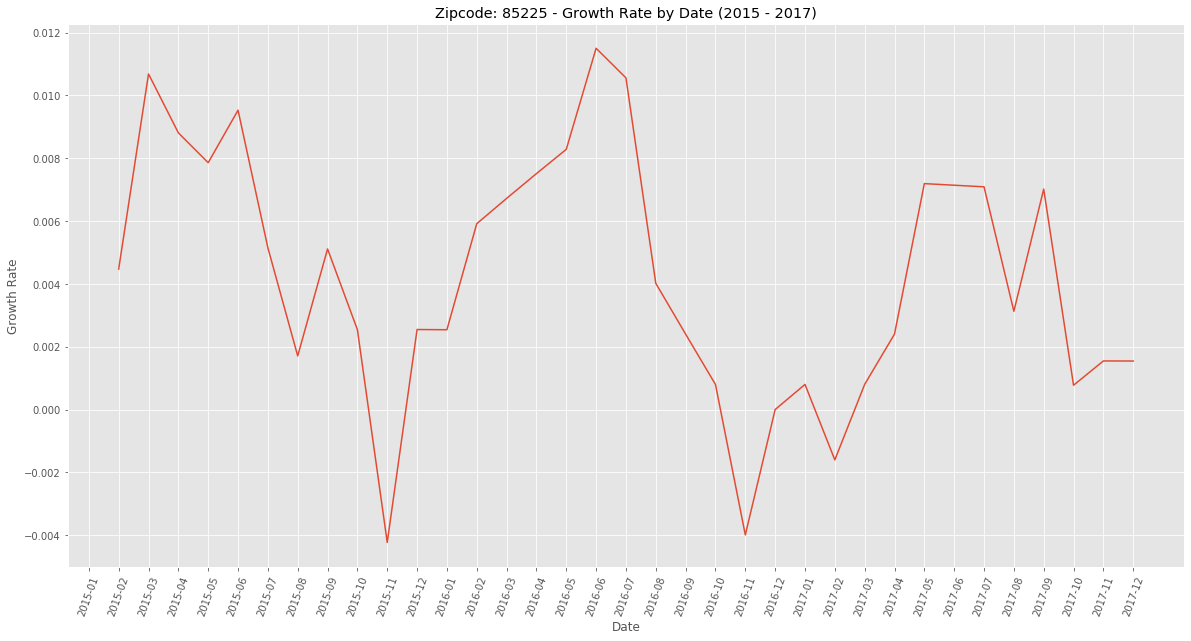

In [36]:
plt.figure(figsize=(20,10))
degrees = 70
plt.xticks(rotation=degrees)
plt.plot(zri_phoenix_growthrate['Date'], zri_phoenix_growthrate[85225])
plt.ylabel("Growth Rate")
plt.xlabel("Date")
plt.title("Zipcode: 85225 - Growth Rate by Date (2015 - 2017)")
plt.savefig('Zipecode 85225')

Plot: Zipcode: 85031 - Growth Rate by Date (2015 - 2017)

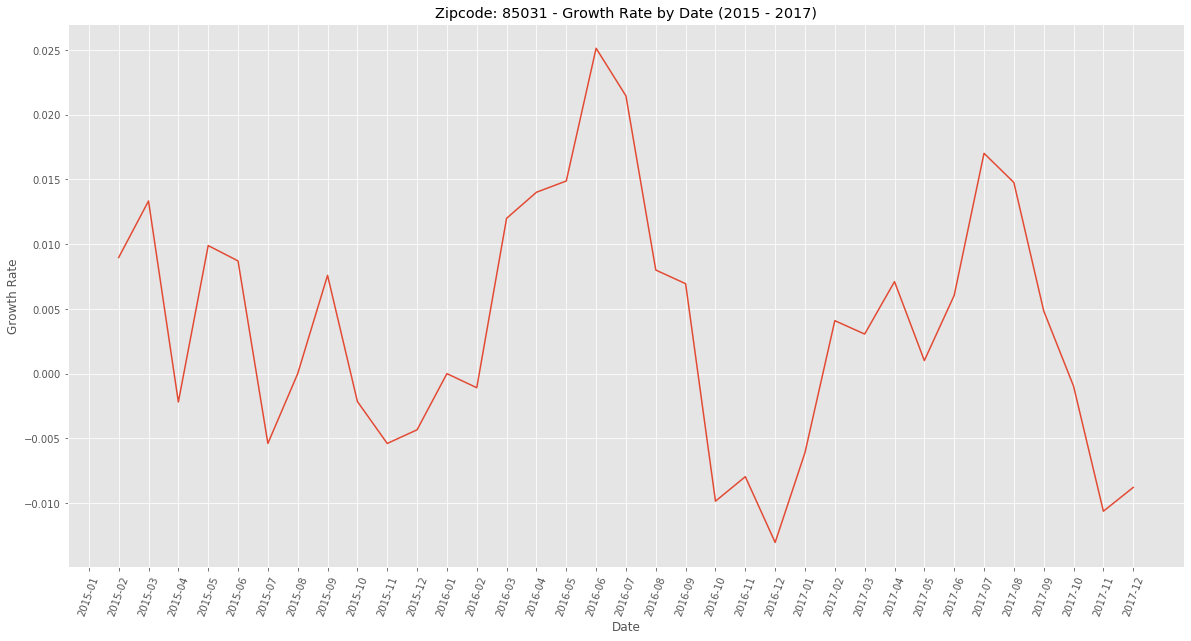

In [37]:
plt.figure(figsize=(20,10))
degrees = 70
plt.xticks(rotation=degrees)
plt.plot(zri_phoenix_growthrate['Date'], zri_phoenix_growthrate[85031])
plt.ylabel("Growth Rate")
plt.xlabel("Date")
plt.title("Zipcode: 85031 - Growth Rate by Date (2015 - 2017)")
plt.savefig('Zipecode 85031')

Plot: Zipcode: 85032 - Growth Rate by Date (2015 - 2017)

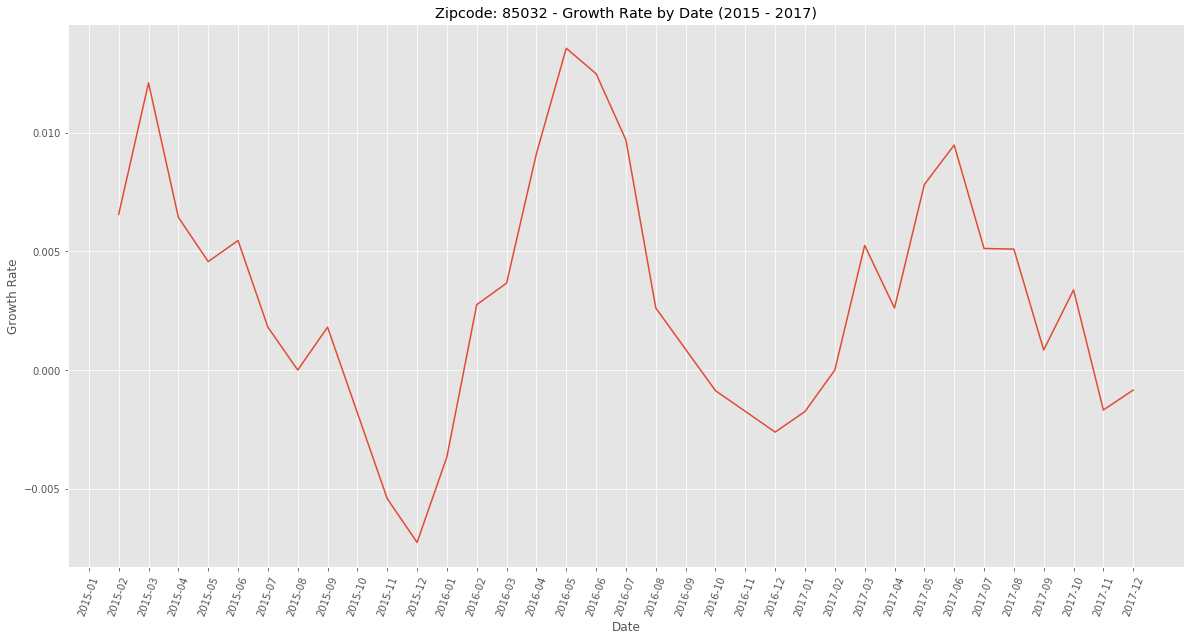

In [38]:
plt.figure(figsize=(20,10))
degrees = 70
plt.xticks(rotation=degrees)
plt.plot(zri_phoenix_growthrate['Date'], zri_phoenix_growthrate[85302])
plt.ylabel("Growth Rate")
plt.xlabel("Date")
plt.title("Zipcode: 85032 - Growth Rate by Date (2015 - 2017)")
plt.savefig('Zipecode 85302')

Average Across Zipcodes : Growth Rate by Date (2015 - 2017)

In [40]:
#Average Across Zipcodes 
gr_copy = zri_phoenix_growthrate.copy()
gr_copy = gr_copy.T
gr_copy.columns = gr_copy.iloc[0]
gr_copy = gr_copy[1:]

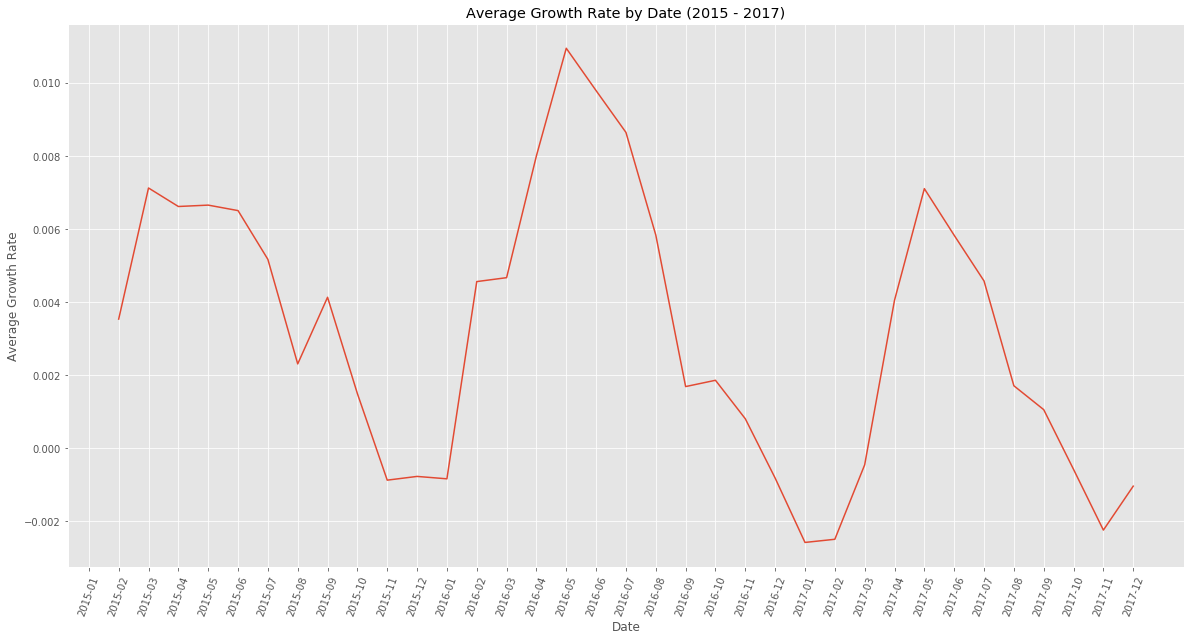

In [43]:
plt.figure(figsize=(20,10))
degrees = 70
plt.xticks(rotation=degrees)
plt.plot(gr_copy.loc[:,"2015-01":'2017-12'].mean())
plt.ylabel("Average Growth Rate")
plt.xlabel("Date")
plt.title("Average Growth Rate by Date (2015 - 2017)")
plt.savefig('Average Growth Rate')

# ZRI Tampa 

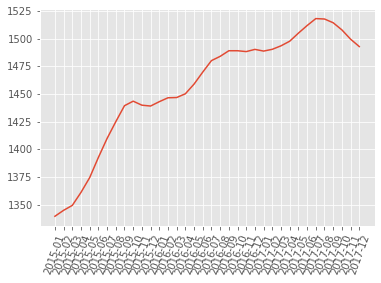

In [47]:
degrees = 70
plt.xticks(rotation=degrees)
zri_all_tampa  = zri_all[zri_all['City'] == 'Tampa']
plt.plot(zri_all_tampa.loc[:,"2015-01":'2017-12'].mean())

# ZRI Miami-Dade County (County Level for the Greater City of Miami, includes more cities)

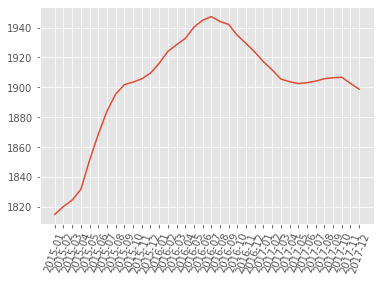

In [48]:
degrees = 70
plt.xticks(rotation=degrees)
zri_all_miamidade  = zri_all[zri_all['CountyName'] == 'Miami-Dade County']
plt.plot(zri_all_miamidade.loc[:,"2015-01":'2017-12'].mean())

# Zip Codes ACS Data 

In [20]:
for col in zip_codes_2015.columns:
    print(col)

geo_id
nonfamily_households
family_households
median_year_structure_built
rent_burden_not_computed
rent_over_50_percent
rent_40_to_50_percent
rent_35_to_40_percent
rent_30_to_35_percent
rent_25_to_30_percent
rent_20_to_25_percent
rent_15_to_20_percent
rent_10_to_15_percent
rent_under_10_percent
total_pop
male_pop
female_pop
median_age
white_pop
black_pop
asian_pop
hispanic_pop
amerindian_pop
other_race_pop
two_or_more_races_pop
not_hispanic_pop
commuters_by_public_transportation
households
median_income
income_per_capita
housing_units
vacant_housing_units
vacant_housing_units_for_rent
vacant_housing_units_for_sale
median_rent
percent_income_spent_on_rent
owner_occupied_housing_units
million_dollar_housing_units
mortgaged_housing_units
families_with_young_children
two_parent_families_with_young_children
two_parents_in_labor_force_families_with_young_children
two_parents_father_in_labor_force_families_with_young_children
two_parents_mother_in_labor_force_families_with_young_children
two_

In [23]:
zip_codes_2015.head()

,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,male_pop,female_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,not_hispanic_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,civilian_labor_force,employed_pop,unemployed_pop,not_in_labor_force,pop_16_over,pop_in_labor_force,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,e

In [30]:
zip_codes_2015.isnull().sum()[zip_codes_2015.isnull().sum() > 0]

median_year_structure_built                                      890
median_age                                                       505
median_income                                                   2053
income_per_capita                                                578
median_rent                                                     5880
percent_income_spent_on_rent                                    5298
aggregate_travel_time_to_work                                  12744
renter_occupied_housing_units_paying_cash_median_gross_rent     5689
owner_occupied_housing_units_lower_value_quartile               2879
owner_occupied_housing_units_median_value                       2327
owner_occupied_housing_units_upper_value_quartile               2356
bachelors_degree_2                                               131
different_house_year_ago_different_city                          131
different_house_year_ago_same_city                               131
gini_index                        

Text(0, 0.5, 'Variables')

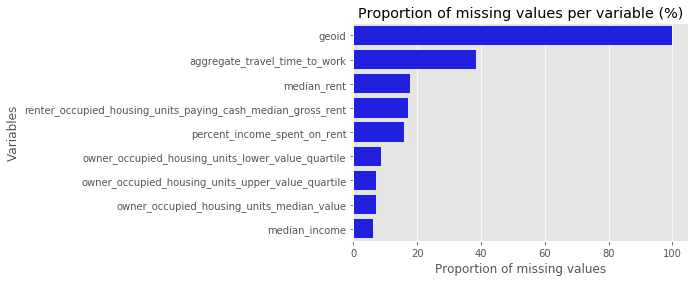

In [28]:
df1 = pd.DataFrame(round(((zip_codes_2015.isna().sum())/zip_codes_2015.shape[0])*100,2)).reset_index()
df1.rename(columns = {'index':'variables', 0:'missing_values'}, inplace = True)
df1 = df1[df1['missing_values'] > 3].sort_values(ascending = False, by = 'missing_values')
sns.barplot(x = 'missing_values', y = 'variables', data = df1, color = 'b')
plt.title('Proportion of missing values per variable (%)', loc = 'center')
plt.xlabel('Proportion of missing values')
plt.ylabel('Variables')

In [68]:
zip_codes_2015['income_per_capita']

0         24343.000000000
1         27493.000000000
2         37742.000000000
3         20519.000000000
4         14368.000000000
5         30673.000000000
6         20058.000000000
7         70911.000000000
8         28892.000000000
9         35806.000000000
10        28149.000000000
11        94587.000000000
12        40555.000000000
13        25846.000000000
14        18684.000000000
15        39607.000000000
16        15784.000000000
17        24192.000000000
18         3855.000000000
19        19807.000000000
20        22399.000000000
21        21976.000000000
22        14588.000000000
23        23961.000000000
24        25663.000000000
25        29696.000000000
26        30302.000000000
27        27960.000000000
28        28039.000000000
29        24219.000000000
30        20110.000000000
31        29800.000000000
32        17231.000000000
33        22787.000000000
34        20099.000000000
35        31421.000000000
36        14668.000000000
37        18389.000000000
38        20

Potential Variables to be Used

In [53]:
zip_codes_2015[['geo_id',
                General Median 
                "median_year_structure_built",                                      
                "median_age",                                                       
                "median_income",                                                   
                "income_per_capita",                                                
                "median_rent" 
                
                    Percent Income 
                    'percent_income_spent_on_rent', 
                    
                    Questionable 
                    'mortgaged_housing_units',
                    'families_with_young_children', 
                    'married_households', 
                    'occupied_housing_units',
                    'housing_units_renter_occupied', 
                    'mobile_homes',
                    'armed_forces', 
                    'civilian_labor_force',
                    'children',
                    
                    Housing Built 
                    'housing_built_2005_or_later',
                    'housing_built_2000_to_2004', 
                    'housing_built_1939_or_earlier', 
                    'households_retirement_income', 
                   
                    
               
                    Employment 
                    'employed_pop', 
                    'unemployed_pop', 
               
                    Labor Force 
                    'not_in_labor_force', 
                    'pop_in_labor_force',
                    
                    
                    
                    Commuters 
                    'commuters_by_bus',
                    'commuters_by_car_truck_van',
                    'commuters_by_carpool',
                    'commuters_by_subway_or_elevated', 
                    'commuters_by_subway_or_elevated', 
                    
                    
                    Different House? 
                    'different_house_year_ago_different_city',
                    'different_house_year_ago_same_city',
                    
                    Employment by Industry 
                    'employed_agriculture_forestry_fishing_hunting_mining',
                    'employed_arts_entertainment_recreation_accommodation_food',
                    'employed_construction',
                    'employed_education_health_social',
                    'employed_finance_insurance_real_estate',
                    'employed_information',
                    'employed_manufacturing',
                    'employed_other_services_not_public_admin',
                    'employed_public_administration',
                    'employed_retail_trade', 
                    'employed_science_management_admin_waste',
                    'employed_transportation_warehousing_utilities', 
                    'employed_wholesale_trade',
                    
                    'female_female_households', 
                    'group_quarters',
                    'households_public_asst_or_food_stamps',
                    'male_male_households',
                    'management_business_sci_arts_employed',
                    'no_cars',
                    'not_us_citizen_pop',
                    'occupation_management_arts', 
                    
                    Cars 
                    'one_car',
                    'two_cars',
                    'three_cars',
                    'four_more_cars'
                    
                    
                    Occuptation
                    'worked_at_home',
                    'occupation_production_transportation_material',
                    'occupation_natural_resources_construction_maintenance'
                    'occupation_sales_office',
                    'occupation_services', 
                    'sales_office_employed',
                    'walked_to_work',
                 
                    Education
                    'associates_degree',
                    'high_school_diploma',
                    'bachelors_degree_2', 
                    'bachelors_degree_or_higher_25_64', 
                    'high_school_including_ged',
                    'bachelors_degree',
                    'graduate_professional_degree',
                    'some_college_and_associates_degree', 
                    'less_one_year_college',
                    'masters_degree',
                    'one_year_more_college', 
                    'in_school',
                    'in_undergrad_college',
                    'less_than_high_school_graduate'
                    
                    groupby regex hispanic
                    'hispanic_any_race',
                    'white_including_hispanic',
                    'black_including_hispanic', 
                    'amerindian_including_hispanic',
                    'asian_including_hispanic',
                    
                    Poverty / Include Gini Index 
                    'gini_index'
                    'pop_determined_poverty_status',
                    'poverty']]
                    
                    

SyntaxError: invalid syntax (<ipython-input-53-a74bfac5d2ef>, line 3)

In [90]:
zip_codes_2015_employment = zip_codes_2015[['employed_pop', 'unemployed_pop', 'not_in_labor_force', 'pop_in_labor_force', 'employed_agriculture_forestry_fishing_hunting_mining',
'employed_arts_entertainment_recreation_accommodation_food','employed_construction','employed_education_health_social',
'employed_finance_insurance_real_estate','employed_information','employed_manufacturing','employed_other_services_not_public_admin',
'employed_public_administration','employed_retail_trade', 'employed_science_management_admin_waste',
    'employed_transportation_warehousing_utilities', 'employed_wholesale_trade']]

Text(0, 0.5, 'bachelors Degree')

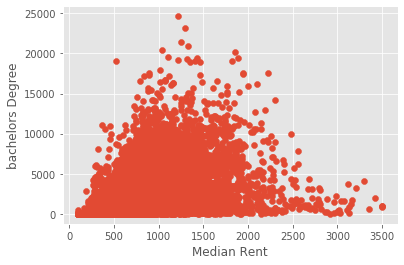

In [66]:
median_rent = zip_codes_2015['median_rent']
bachelors_degree = zip_codes_2015['bachelors_degree']
plt.scatter(median_rent, bachelors_degree)
plt.xlabel("Median Rent")
plt.ylabel("bachelors Degree")

Text(0, 0.5, 'Four + Cars')

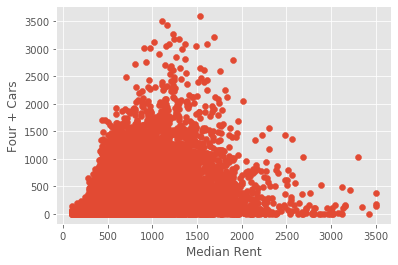

In [67]:
median_rent = zip_codes_2015['median_rent']
four_more_cars = zip_codes_2015['four_more_cars']
plt.scatter(median_rent, four_more_cars)
plt.xlabel("Median Rent")
plt.ylabel("Four + Cars")

In [ ]:
median_rent = zip_codes_2015['median_rent']
four_more_cars = zip_codes_2015['four_more_cars']
plt.scatter(median_rent, four_more_cars)
plt.xlabel("Median Rent")
plt.ylabel("Four + Cars")

In [ ]:
zip_codes_2015['median_rent']

Linear Models Attempt - Not Successful

In [101]:
phoenix_zri_month_2015 = phoenix_zri_monthly.loc[:,'2015-01':'2015-12']
phoenix_zri_month_2015.isnull().sum()[phoenix_zri_month_2015.isnull().sum() > 0]
phoenix_zri_month_2015 = phoenix_zri_month_2015.astype(float)
phoenix_zri_month_2015
#fffill

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
69,1171.0,1176.0,1185.0,1191.0,1200.0,1207.0,1211.0,1212.0,1215.0,1221.0,1222.0,1230.0
483,1145.0,1147.0,1159.0,1163.0,1166.0,1176.0,1181.0,1182.0,1185.0,1195.0,1198.0,1206.0
527,1019.0,1023.0,1033.0,1050.0,1058.0,1077.0,1084.0,1078.0,1079.0,1078.0,1070.0,1062.0
793,1782.0,1793.0,1812.0,1852.0,1865.0,1871.0,1870.0,1862.0,1865.0,1855.0,1855.0,1874.0
896,1297.0,1307.0,1315.0,1328.0,1340.0,1348.0,1359.0,1362.0,1378.0,1392.0,1395.0,1395.0
1122,1391.0,1408.0,1423.0,1443.0,1461.0,1468.0,1478.0,1479.0,1495.0,1497.0,1499.0,1504.0
1172,1240.0,1246.0,1250.0,1256.0,1267.0,1276.0,1280.0,1279.0,1279.0,1280.0,1282.0,1288.0
1189,1000.0,1008.0,1023.0,1035.0,1039.0,1049.0,1052.0,1051.0,1057.0,1053.0,1040.0,1034.0
1226,1059.0,1068.0,1086.0,1100.0,1108.0,1121.0,1117.0,1118.0,1123.0,1116.0,1108.0,1102.0
1384,1157.0,1160.0,1171.0,1177.0,1185.0,1195.0,1202.0,1206.0,1207.0,1213.0,1213.0,1221.0


In [102]:
phoenix_zri_month_2015.isnull().sum()[phoenix_zri_month_2015.isnull().sum() > 0]

2015-01    1
2015-02    1
2015-07    1
dtype: int64

In [95]:
#zip_codes_2015_employment.isnull().sum()[zip_codes_2015_employment.isnull().sum() > 0]
zip_codes_2015_employment = zip_codes_2015_employment.astype(int)

In [98]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(zip_codes_2015_employment, phoenix_zri_month_2015)
residuals = phoenix_zri_month_2015 - lm.predict(zip_codes_2015_employment)
plt.hist(residuals)

print('R^2 is equal to %.3f' %(lm.score(zip_codes_2015_employment, phoenix_zri_month_2015)))
print('RSS is equal to %.3f' %(sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

print('negative slope column names %s' %(zip_codes_2015_employment[lm.coef_ < 0]))
print('positive slope column names %s' %(zip_codes_2015_employment[lm.coef_ > 0]))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
Future Work: 
Linear Regresssion 
Ridge & Lasso 
Decesion Tree 